In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_seed = 42

# Load the Titanic dataset
data = pd.read_csv(r'C:\Users\harsh\Desktop\CodSoft\Task 1\Dataset.csv')

# Preprocessing
data.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], inplace=True)

label_encoders = {}
categorical_features = ['Sex', 'Embarked'] 
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le


X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Model training
model = RandomForestClassifier(random_state=random_seed)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[65  0]
 [ 0 35]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        35

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



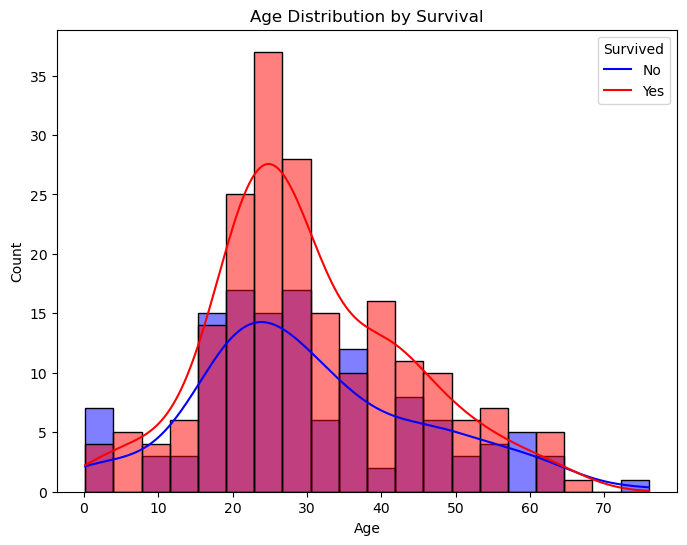

In [8]:
# Age Distribution by class
custom_palette = sns.color_palette(['red', 'blue'])

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Survived', bins=20, kde=True, palette=custom_palette)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

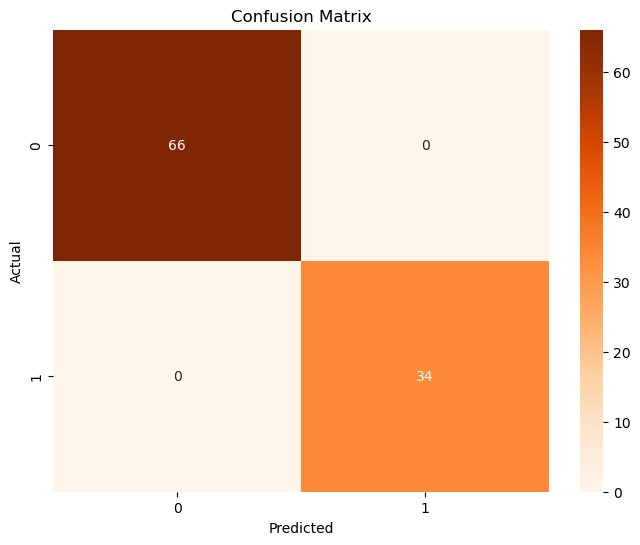

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [10]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(class_report)


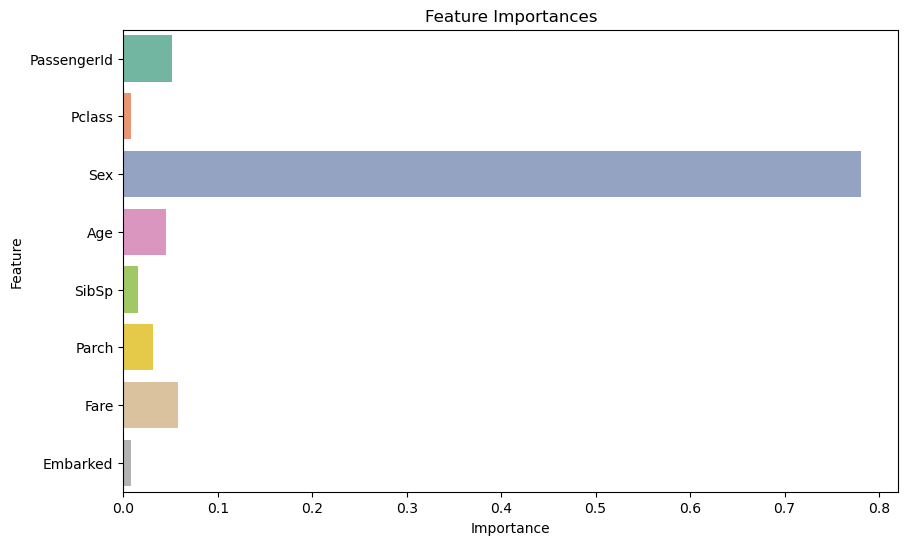

In [11]:
#Feature Importances
feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='Set2') 
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


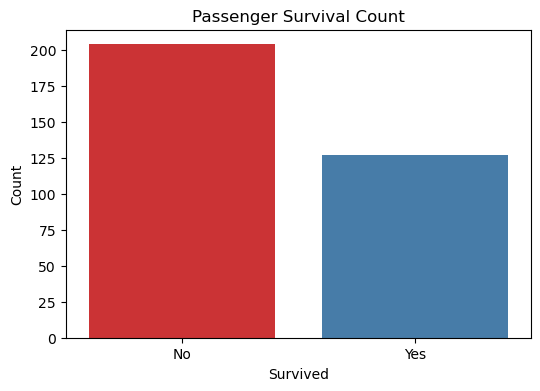

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Survived', palette='Set1')
plt.title('Passenger Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()